In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\DELL2025\Downloads\Customer Churn.csv",encoding="ISO-8859-1")
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


In [4]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isna().sum().sort_values(ascending=False)

InternetService         2129
CaseOrder                  0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Customer_id                0
Lng                        0
Population                 0
TimeZone                   0
Area                       0
Children                   0
Age                        0
Income                     0
Job                        0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Marital                    0
Contract                   0
Port_modem                 0
Tablet                     0
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

<Axes: >

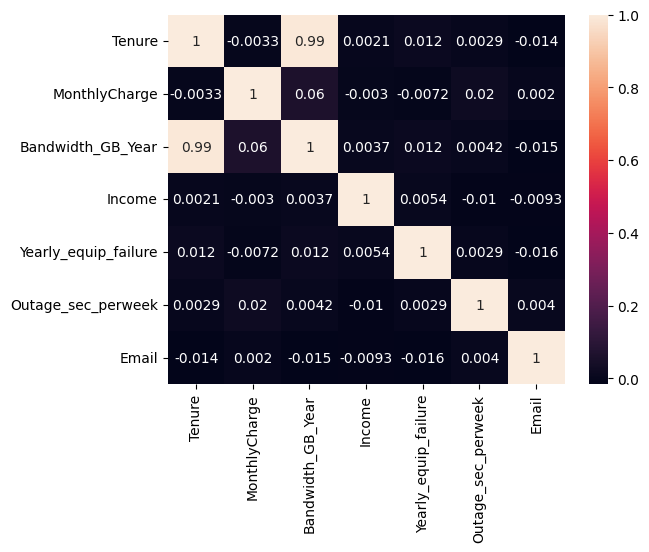

In [8]:
data_num = data.select_dtypes(include=['number'])
sns.heatmap(data_num[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Income','Yearly_equip_failure','Outage_sec_perweek','Email']].corr(),annot=True)

In [9]:
total_customers = data.shape[0]
churn = data[data['Churn']=='Yes'].shape[0]

chern_percent =  (churn / data['Churn'].shape[0] ) * 100

print(chern_percent)

26.5


In [10]:
# Filter data where Churn is 'Yes'
churn_data = data[data['Churn'] == 'Yes']

# Define bin edges from min to max with logical intervals
bins = [348.67, 1000, 5000, 20000, 50000, 100000, 258900.70]  # 7 bin edges

# Define labels (must be one less than the number of bins)
labels = ['349-999', '1000-4999', '5000-19999', '20000-49999', '50000-99999', '100000-258900']

# Add a new column for age ranges
churn_data['incomeRange'] = pd.cut(churn_data['Income'], bins=bins, labels=labels, right=False)

# Calculate churn percent for each age range
churn_percent_by_incomeRange = churn_data['incomeRange'].value_counts(normalize=True) * 100

# Display the result
print(churn_percent_by_incomeRange)

incomeRange
20000-49999      44.867925
50000-99999      24.716981
5000-19999       23.509434
100000-258900     4.113208
1000-4999         2.603774
349-999           0.188679
Name: proportion, dtype: float64


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_15036\2162331322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['incomeRange'] = pd.cut(churn_data['Income'], bins=bins, labels=labels, right=False)


In [11]:

# Group by Age and Churn, then count the occurrences of 'Churn'
churn_counts = churn_data.groupby('Age')['Churn'].value_counts().sort_values(ascending=False)

# Display the result
print(churn_counts)


Age  Churn
40   Yes      49
76   Yes      48
70   Yes      47
63   Yes      47
19   Yes      45
              ..
18   Yes      29
36   Yes      29
44   Yes      29
33   Yes      28
88   Yes      26
Name: count, Length: 72, dtype: int64


In [12]:
chern_percent_age = (churn_counts / total_customers ) *100
chern_percent_age

Age  Churn
40   Yes      0.49
76   Yes      0.48
70   Yes      0.47
63   Yes      0.47
19   Yes      0.45
              ... 
18   Yes      0.29
36   Yes      0.29
44   Yes      0.29
33   Yes      0.28
88   Yes      0.26
Name: count, Length: 72, dtype: float64

In [13]:
# Define age ranges
bins = [0, 20, 30, 40, 50, 60, 70, 80, ]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Add a new column for age ranges
churn_data['AgeRange'] = pd.cut(churn_data['Age'], bins=bins, labels=labels, right=False)

# Calculate churn percent for each age range
churn_percent_by_age_range = churn_data['AgeRange'].value_counts(normalize=True) * 100

# Display the result
print(churn_percent_by_age_range)

AgeRange
71-80    16.521739
21-30    16.478261
51-60    16.434783
61-70    16.043478
41-50    15.913043
31-40    15.391304
0-20      3.217391
Name: proportion, dtype: float64


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_15036\3470977065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['AgeRange'] = pd.cut(churn_data['Age'], bins=bins, labels=labels, right=False)


In [14]:
contract = churn_data.groupby('Contract')['Churn'].value_counts().sort_values(ascending=False) 

contract_churn_percent = ( contract / total_customers ) *100
contract_churn_percent

Contract        Churn
Month-to-month  Yes      20.34
Two Year        Yes       3.09
One year        Yes       3.07
Name: count, dtype: float64

In [15]:
# Define Tenture ranges
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Add a new column for age ranges
churn_data['TentureRange'] = pd.cut(churn_data['Tenure'], bins=bins, labels=labels, right=False)

# Calculate churn percent for each age range
churn_percent_by_Tenture_range = churn_data['TentureRange'].value_counts(normalize=True)  * 100

# Display the result
print(churn_percent_by_Tenture_range)

TentureRange
0-20     85.660377
51-60     3.547170
21-30     3.509434
61-70     3.132075
41-50     2.981132
31-40     0.830189
71-80     0.339623
Name: proportion, dtype: float64


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_15036\1222345785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['TentureRange'] = pd.cut(churn_data['Tenure'], bins=bins, labels=labels, right=False)


In [16]:

InternetService = churn_data.groupby('InternetService')['Churn'].value_counts().sort_values(ascending=False) 

InternetService_churn_percent = ( InternetService / total_customers) *100
InternetService_churn_percent

InternetService  Churn
DSL              Yes      11.14
Fiber Optic      Yes      10.40
Name: count, dtype: float64

In [17]:
# Define MonthlyChargeRange
bins = [ 80 , 140 , 170 , 200 , 290 ]
labels = [ '71-139' , '140-169' ,'170-199','200-291' ]

# Add a new column for age ranges
churn_data['MonthlyChargeRange'] = pd.cut(churn_data['MonthlyCharge'], bins=bins, labels=labels, right=False)

# Calculate churn percent for each age range
churn_percent_by_MonthlyChargeRange_range = churn_data['MonthlyChargeRange'].value_counts(normalize=True) * 100

# Display the result
print(churn_percent_by_MonthlyChargeRange_range)

MonthlyChargeRange
200-291    50.094447
170-199    23.460521
140-169    16.962599
71-139      9.482433
Name: proportion, dtype: float64


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_15036\4177442826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['MonthlyChargeRange'] = pd.cut(churn_data['MonthlyCharge'], bins=bins, labels=labels, right=False)


In [18]:
#leaving customers due to Yearly_equip_failure

Yearly_equip_failure_leaving = churn_data.groupby('Yearly_equip_failure')['Churn'].value_counts().sort_values(ascending=False) 

equip_failure_leavingpercent = (Yearly_equip_failure_leaving / total_customers ) * 100

print(equip_failure_leavingpercent)

Yearly_equip_failure  Churn
0                     Yes      17.96
1                     Yes       7.17
2                     Yes       1.18
3                     Yes       0.19
Name: count, dtype: float64


In [19]:
#leaving customers due to Outage_sec_perweek
Outage_sec_perweek_leaving = churn_data.groupby('Outage_sec_perweek')['Churn'].value_counts().sort_values(ascending=False) 

Outage_sec_perweek_leaving_percent = (Outage_sec_perweek_leaving / total_customers ) * 100

print(Outage_sec_perweek_leaving_percent)

Outage_sec_perweek  Churn
21.207230           Yes      0.01
0.232279            Yes      0.01
0.355048            Yes      0.01
0.507375            Yes      0.01
0.636608            Yes      0.01
                             ... 
2.358964            Yes      0.01
2.310585            Yes      0.01
2.292588            Yes      0.01
2.265527            Yes      0.01
2.205001            Yes      0.01
Name: count, Length: 2650, dtype: float64


In [20]:
#leaving customers due to Frequant Emails
Email_leaving = churn_data.groupby('Email')['Churn'].value_counts().sort_values(ascending=False) 

Email_leaving_percent = (Email_leaving / total_customers ) * 100

print(Email_leaving_percent)

Email  Churn
12     Yes      3.59
13     Yes      3.58
11     Yes      3.20
14     Yes      2.92
10     Yes      2.78
15     Yes      2.15
9      Yes      1.96
8      Yes      1.34
16     Yes      1.34
17     Yes      0.89
7      Yes      0.86
18     Yes      0.53
6      Yes      0.47
19     Yes      0.33
5      Yes      0.30
20     Yes      0.10
4      Yes      0.05
2      Yes      0.04
3      Yes      0.03
21     Yes      0.02
22     Yes      0.01
23     Yes      0.01
Name: count, dtype: float64


In [21]:
bins = [155, 500, 1000, 2000, 4000, 6000, 7190]  # 7 bin edges

# Define labels (one fewer than bins)
labels = ['155-499', '500-999', '1000-1999', '2000-3999', '4000-5999', '6000-7190']

# Add a new column for age ranges
churn_data['Bandwidth_GB_YearRange'] = pd.cut(churn_data['Bandwidth_GB_Year'], bins=bins, labels=labels, right=False)

# Calculate churn percent for each age range
churn_percent_by_Bandwidth_GB_YearRange_range = churn_data['Bandwidth_GB_YearRange'].value_counts(normalize=True) * 100

# Display the result
print(churn_percent_by_Bandwidth_GB_YearRange_range)

Bandwidth_GB_YearRange
1000-1999    51.584906
500-999      24.150943
2000-3999    11.849057
4000-5999     7.433962
6000-7190     2.792453
155-499       2.188679
Name: proportion, dtype: float64


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_15036\3948113370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Bandwidth_GB_YearRange'] = pd.cut(churn_data['Bandwidth_GB_Year'], bins=bins, labels=labels, right=False)


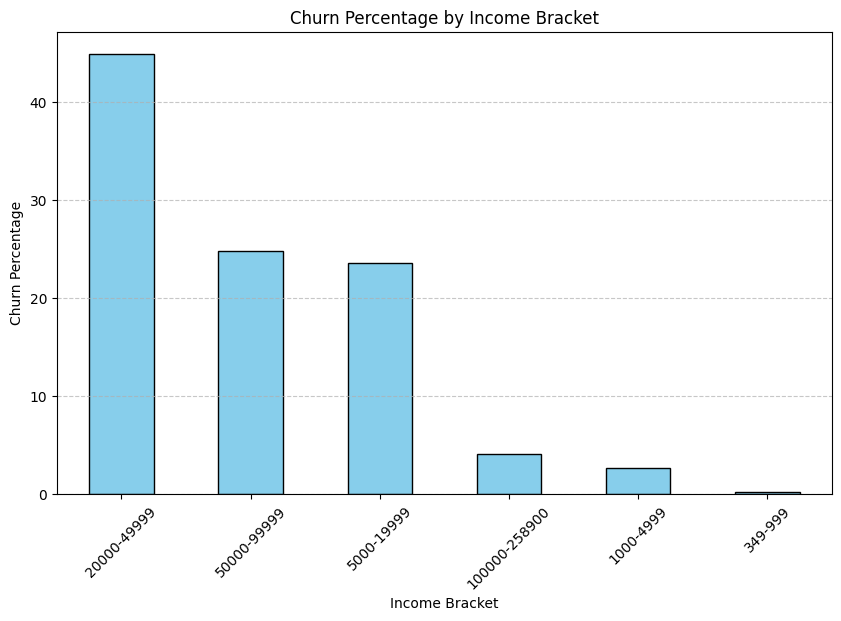

In [25]:
# Plot a bar chart for churn by income bracket
churn_percent_by_incomeRange.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Churn Percentage by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Churn Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

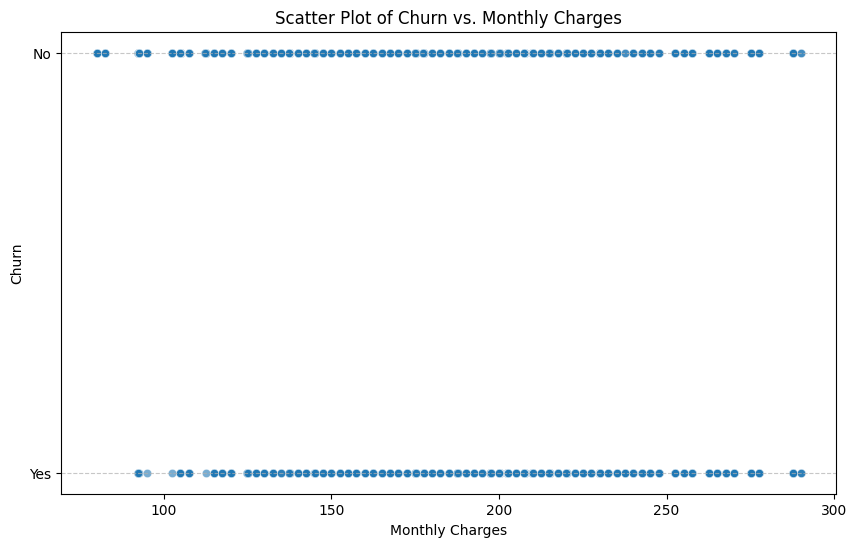

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MonthlyCharge', y='Churn', alpha=0.6)
plt.title('Scatter Plot of Churn vs. Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

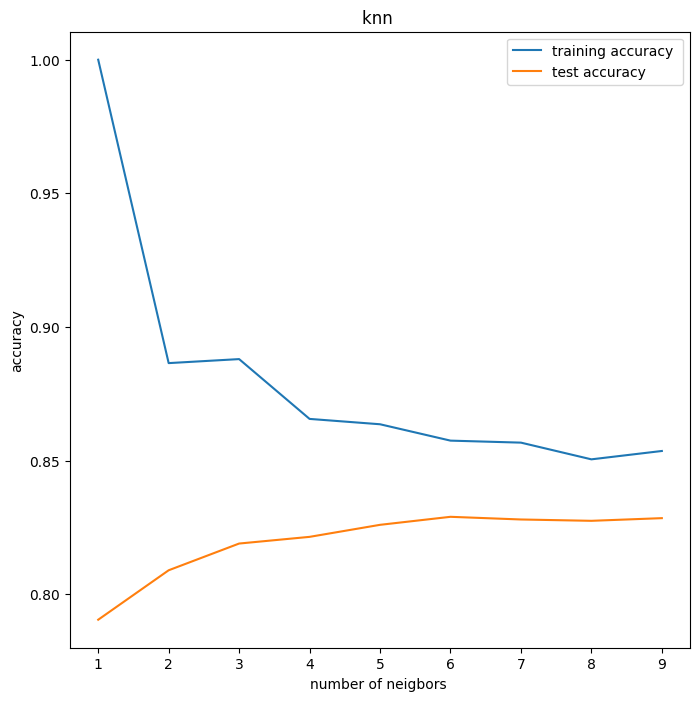

In [22]:
x= data[['Tenure','MonthlyCharge','Bandwidth_GB_Year']].values
y = data['Churn'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

train_accurecies = {}
test_accurecies = {}
neighbors = np.arange(1,10)
for neighbor in neighbors :
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train,y_train)
    train_accurecies[neighbor] = knn.score(x_train,y_train)
    test_accurecies[neighbor] = knn.score(x_test,y_test)


plt.figure(figsize=(8,8))
plt.title ("knn ")
plt.plot(neighbors,train_accurecies.values(),label = "training accuracy ")
plt.plot(neighbors,test_accurecies.values(),label = "test accuracy ")
plt.legend()
plt.xlabel("number of neigbors ")
plt.ylabel("accuracy")
plt.show()



In [23]:
knn =KNeighborsClassifier(n_neighbors=6)
knn.fit(x,y)
print(knn.score(x,y))
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.8582
0.85575
0.868


In [24]:
x_new = np.array([[62 , 175 , 4000],[70 , 280 , 6500],[50 , 178 , 7000],[12 , 140 , 1000],[15 , 130 , 5000]])
predictions = knn.predict(x_new)
print (predictions)

['No' 'No' 'No' 'No' 'No']
